# Statistics Excersise on College Dataset

This dataset is from the *Introduction to Statistical Learning* book's <a href="http://www-bcf.usc.edu/~gareth/ISL/data.html">website</a>. 

___
The purpose of this excersize is to apply some basic probability theory to this dataset.
Make some predictions and report some statistics.
___

## The Data

These are the data atributes and their meanings
* Private: public/private indicator
* Apps: number of applications received
* Accept: number of applications accepted
* Enroll: number of new students enrolled
* Top10perc: new students from top 10% of H.S. class
* Top25perc: new students from top 25% of H.S. class
* F.Undergrad: number of fulltime undergraduates
* P.Undergrad: number of parttime undergraduates
* Outstate: out-of-state tuition
* Room.Board: room and board costs
* Books: estimated book costs
* Personal: estimated personal spending
* PhD: percent of faculty with Ph.D.’s
* Terminal: percentt of faculty with terminal degree
* S.F.Ratio: student/faculty ratio
* perc.alumni: percent alumni who donate
* Expend: instructional expenditure per student
* Grad.Rate: graduation rate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data into a pandas dataframe
df = pd.read_csv('College_Data')

In [3]:
# check out the first 5 observations
df.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [4]:
# get info on the dataset features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
Unnamed: 0     777 non-null object
Private        777 non-null object
Apps           777 non-null int64
Accept         777 non-null int64
Enroll         777 non-null int64
Top10perc      777 non-null int64
Top25perc      777 non-null int64
F.Undergrad    777 non-null int64
P.Undergrad    777 non-null int64
Outstate       777 non-null int64
Room.Board     777 non-null int64
Books          777 non-null int64
Personal       777 non-null int64
PhD            777 non-null int64
Terminal       777 non-null int64
S.F.Ratio      777 non-null float64
perc.alumni    777 non-null int64
Expend         777 non-null int64
Grad.Rate      777 non-null int64
dtypes: float64(1), int64(16), object(2)
memory usage: 115.4+ KB


It looks like we have 777 observations of various data types. Mostly integers.

## Check out the distribution of graduation rates for all the colleges

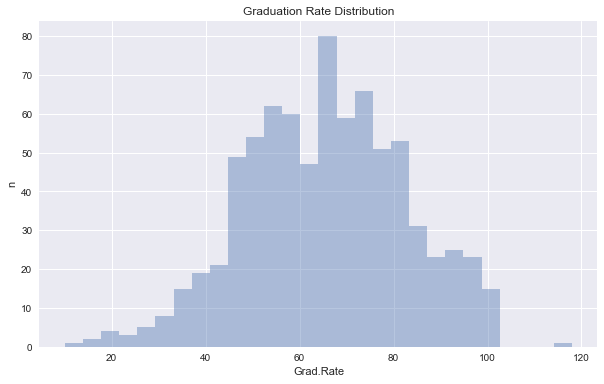

In [5]:
n_bins = int(np.ceil(np.sqrt(len(df.index))))  # calculate # of bins
f = plt.figure(figsize=(10,6))
sns.distplot(df['Grad.Rate'],bins=n_bins,kde=False)
plt.ylabel('n')
plt.title('Graduation Rate Distribution')

This distribution looks normaly distributed. However, there is a wierd outlier that doesn't make sense. Let's fix that.

In [6]:
# find non-sense data point
df[df['Grad.Rate']>100]

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  Top25perc  \
95  Cazenovia College     Yes  3847    3433     527          9         35   

    F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
95         1010           12      9384        4840    600       500   22   

    Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
95        47       14.3           20    7697        118

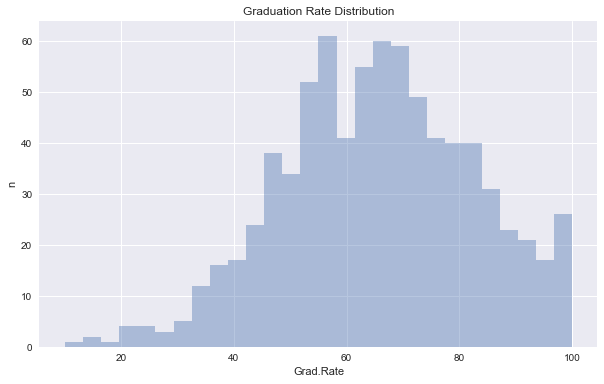

In [7]:
# change it to 100% so it makes sense
df.loc[df['Grad.Rate']>100, 'Grad.Rate'] = 100
# see if it worked
f = plt.figure(figsize=(10,6))
sns.distplot(df['Grad.Rate'],bins=n_bins,kde=False)
plt.ylabel('n')
plt.title('Graduation Rate Distribution')

## Some basic stats the manual way:

In [8]:
# homebrewed mean
my_mean = df['Grad.Rate'].sum()/df['Grad.Rate'].count()

# defining a function for the variance
def var_fun(x, mu):
    """
    var_fun:(sample population, sample mean)
        
        Calculates the variance of a sample population given its mean
    """
    x = x.values
    my_vari = sum([(item-mu)**2 for item in x])/len(x)
    return my_vari
my_var = var_fun(df['Grad.Rate'], my_mean)

print('Basic stats for graduation rate the "homebrew" way:')
print('The mean graduation rate is ' + str(round(my_mean,3)))
print('The variance is ' + str(round(my_var,3)))
print('The standard deviation is ' + str(round(np.sqrt(my_var),3)))


Basic stats for graduation rate the "homebrew" way:
The mean graduation rate is 65.44
The variance is 292.676
The standard deviation is 17.108


## Some basic stats the "Python way":

In [9]:
py_mean = df['Grad.Rate'].mean()
py_var = df['Grad.Rate'].var()
py_std = df['Grad.Rate'].std()

print('Basic stats for graduation rate the Python way:')
print('The mean graduation rate is ' + str(round(py_mean,3)))
print('The variance is ' + str(round(py_var,3)))
print('The standard deviation is ' + str(round(np.sqrt(py_var),3)))

Basic stats for graduation rate the Python way:
The mean graduation rate is 65.44
The variance is 293.053
The standard deviation is 17.119


or... we could use the one-liner from the Pandas library:

In [10]:
df['Grad.Rate'].describe()

count    777.000000
mean      65.440154
std       17.118804
min       10.000000
25%       53.000000
50%       65.000000
75%       78.000000
max      100.000000
Name: Grad.Rate, dtype: float64

** This dataset is made up of both private and public colleges. Let's see the difference in graduation rates:**

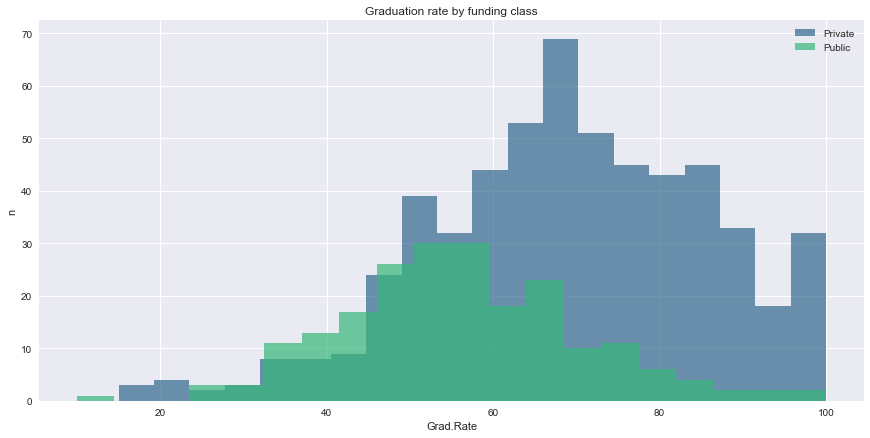

In [11]:
g = sns.FacetGrid(df,hue="Private",palette='viridis',size=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
plt.legend(['Private','Public'])
plt.ylabel('n')
plt.title('Graduation rate by funding class')

From this plot, it looks like private colleges, on average have a higher graduation rate. Lets calculate the mean for each.

In [12]:
priv_or_pub = df.groupby('Private').mean()
priv_or_pub['Grad.Rate']

Private
No     56.042453
Yes    68.966372
Name: Grad.Rate, dtype: float64

** A classic graph in statistics to investigate how the data is dispersed throughout the set **

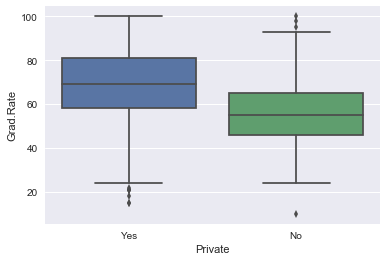

In [13]:
sns.boxplot(x='Private',y='Grad.Rate',data=df)

## Lets explore the relationship between the student faculty ratio and graduation rate

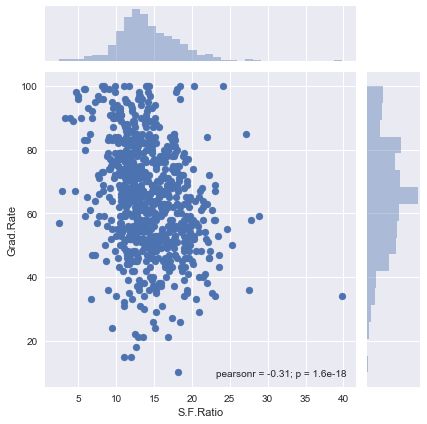

In [24]:
sns.jointplot(x='S.F.Ratio',y='Grad.Rate',data=df,kind='scatter')

it looks like there may be a linear correlation here. We can plot a regression line through this data

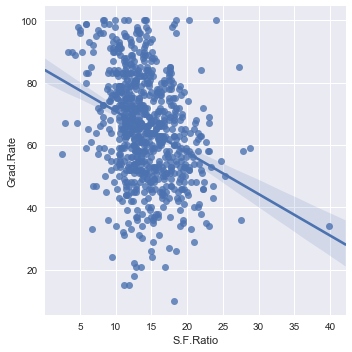

In [20]:
sns.lmplot(x='S.F.Ratio',y='Grad.Rate',data = df)

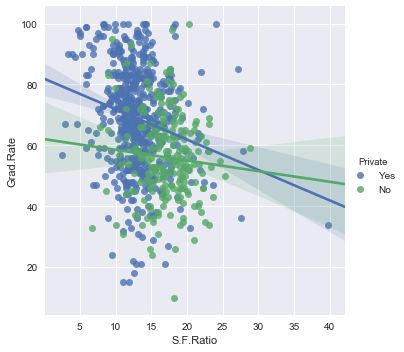

In [23]:
# separating private vs. public
sns.lmplot(x='S.F.Ratio',y='Grad.Rate',data = df,hue='Private',legend=True)

Just from looking at the plot, it doesn't look like student/faculty ratio is a very good predictor of graduation rate. But let's push forward to quantify the regression line's performance.

# Here we will get into some basic machine learning.

First I'll set assign the data I'm interested in to the standard variables used in ML.

In [41]:
y = df['Grad.Rate']   # thing I want to predict
X = df['S.F.Ratio'].values.reshape(-1,1)   # data I have to predict with
# had to reshape X array because it only has 1 attribute (i got a warning that told me to do this)

Now I'll use a library from scikit learn to split the data into a training set and a testing set

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Now I can train a linear regression model to the training set.
I will do this by importing a linear regression method from scikit learn, initializing an instance and then fitting the training data to that instance.

In [43]:
from sklearn.linear_model import LinearRegression

In [45]:
lin_model = LinearRegression()

In [46]:
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that the regression model has been built, I can print out the coefficients of the model

In [48]:
print('Linear Regression Model Coefficient : \n', lin_model.coef_)

Linear Regression Model Coefficient : 
 [-1.32642572]


Yay! we found the slope of a line. Who Hoo! But what does this slope mean?

For every unit increase in the student/faculty ratio, we predict that there will be a drop in the graduation rate of about 1.3%

## Lets make some predictions based on our new model and the test data

using the predict method I can create an array of predictions

In [50]:
predictions = lin_model.predict(X_test)

Here are all the graduation rate predictions our model made based on the student/faculty ratios of our test data

In [51]:
predictions

array([ 66.23209228,  71.53779517,  60.26317654,  65.83416457,
        66.23209228,  70.47665459,  70.74193973,  65.83416457,
        63.04867055,  63.97716856,  70.47665459,  73.39479118,
        63.18131312,  65.1709517 ,  68.08908829,  67.02794771,
        71.80308031,  68.75230115,  66.09944971,  62.38545769,
        61.19167454,  63.44659827,  68.75230115,  66.36473485,
        55.35540137,  64.50773884,  55.09011622,  63.97716856,
        64.2424537 ,  70.34401202,  60.52846168,  66.23209228,
        69.15022887,  63.44659827,  68.88494372,  62.51810026,
        57.61032509,  70.21136945,  69.68079916,  65.83416457,
        60.39581911,  68.88494372,  67.29323286,  69.28287144,
        66.36473485,  69.0175863 ,  73.2621486 ,  61.19167454,
        61.98752997,  60.26317654,  58.27353795,  60.79374682,
        74.7212169 ,  63.18131312,  69.28287144,  71.53779517,
        58.40618053,  67.16059029,  72.46629317,  70.60929716,
        70.47665459,  71.67043774,  68.48701601,  59.20

** Since we know the actual graduation rates of the test data we can see how well our model performed! **

Lets visualize the performance.  If the graph shows a strong linear correlation then it performed well. The more "scattered" the plot is, the less of a predictor it is.

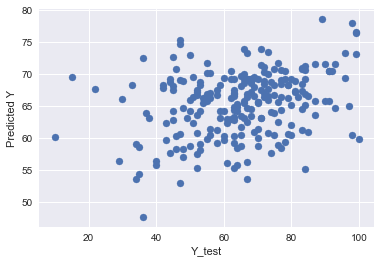

In [53]:
# lets visualize the performance
plt.scatter(y_test, predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted Y')

Well, it looks pretty sucky. But we can quantify its suckiness using sklearn's metrics library.

The most common metrics for evaluating the performance of a regression model are the:

%%latex 
* mean absolute error - measures the difference between two continouis variables (cite: <a href="https://en.wikipedia.org/wiki/Mean_absolute_error">wiki</a>

 $ MAE = \frac{\sum_{i=1}^n |y_i-x_i|}{n}$
* mean squared error - this is a measure of the quality of the model. Values closer to zero have higher quality

 $ MSE = \frac{1}{n}\sum_{i=1}^n (\hat{Y}_i-Y_i)^2$
 
 where: $\hat{Y_i}$ are predicted values and $Y_i$ are observed values
 

* root mean squared error - _ this is a meacure of how accurate the model was. The RMSE is affected by both the average of the squared errors and the variation of the errors. This means that if your data has a lot, or extreme outliers, the RSME will be higher.

 $ RMSE = \sqrt{\frac{\sum_{i=1}^n (\hat{y}_i-y_i)^2}{n}}$
 
 where: $\hat{y_i}$ are predicted values and $y_i$ are observed values
 
 
(cite: <a href="https://en.wikipedia.org/wiki/Mean_absolute_error">wiki</a>)

To get these values lets let python do the math for us!

In [54]:
from sklearn import metrics

In [55]:
MAE = metrics.mean_absolute_error(y_test,predictions)
MSE = metrics.mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)

MAE =  12.0757801432
MSE =  241.121418312
RMSE =  15.5280848243


Now we have performance measures that we can compare to other models.

## Can we create a linear model that does a good job at predicting graduation rate?

In the last model we were only looking at one atribute in the dataset.  Let's add more.

We could just choose some more attributes based on our intuition. But, sometimes that could be dangerous, what if our initial assumptions are wrong?

We can visualize correlations between atributes with a heat map!

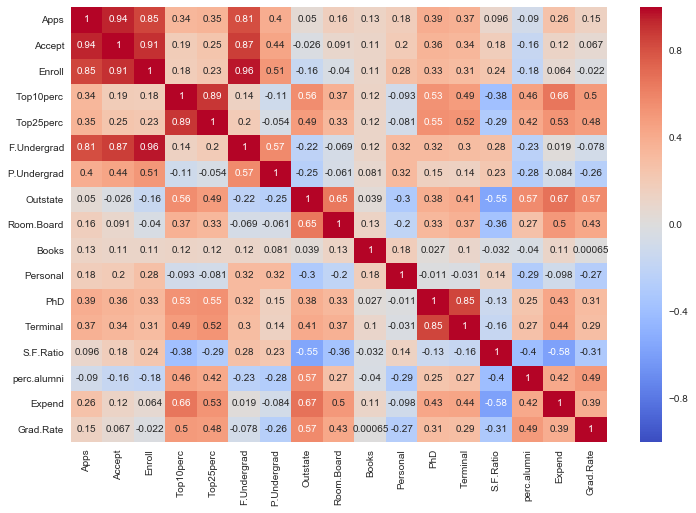

In [60]:
f = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Now I want to choose a few attributes that have higher correlation values relative to Grad.Rate.  It looks like there are more attributes that positivley correlated to graduation rate, so I will build a model that predicts an increase in graduation rate.

perc.alumni, Top10perc, Top25perc,Outstate look like good canditates. Lets redefine our X data and work build another model

In [107]:
X_new = df[['Top10perc','Outstate','Top25perc','perc.alumni']]

In [115]:
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new,y,test_size=0.3)

In [116]:
new_lin_model = LinearRegression()

In [117]:
new_lin_model.fit(X_train_new,y_train_new)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now that the new model is built we can look at our coefficients

In [118]:
print('New model coefficients: \n', new_lin_model.coef_)

New model coefficients: 
 [ 0.00348829  0.00159156  0.21768599  0.25356843]


In [119]:
new_predictions = new_lin_model.predict(X_test_new)

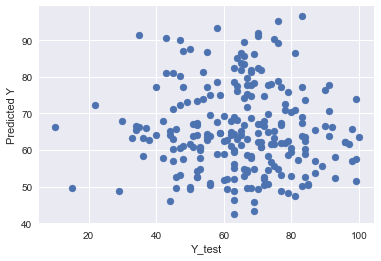

In [120]:
# lets visualize the performance
plt.scatter(y_test, new_predictions)
plt.xlabel('Y_test')
plt.ylabel('Predicted Y')

In [122]:
MAE_new = metrics.mean_absolute_error(y_test_new,new_predictions)
MSE_new = metrics.mean_squared_error(y_test_new,new_predictions)
RMSE_new = np.sqrt(MSE_new)
print('New model:')
print('MAE = ', MAE_new)
print('MSE = ', MSE_new)
print('RMSE = ', RMSE_new)
print('\n')
print('Old model:')
print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)

New model:
MAE =  10.3532465805
MSE =  180.127123147
RMSE =  13.4211446288


Old model:
MAE =  12.0757801432
MSE =  241.121418312
RMSE =  15.5280848243


A marginal improvement.  It turns out that a linear regression model is not a good predictor of higher graduation rates for this dataset.